In [1]:
!pip install paddleocr
!pip install paddlepaddle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 12.5 MB/s e

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


In [6]:
imgPath='X00016469671_org.jpg'

In [7]:
import os

if os.path.exists(imgPath):
    print("Image file exists.")
else:
    print("Image file does not exist.")


Image file exists.


[2024/01/22 16:16:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

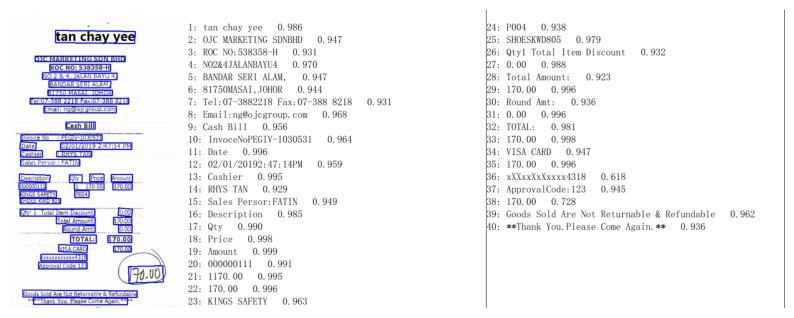

In [10]:
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import json
import matplotlib.pyplot as plt

ocr = PaddleOCR(use_angle_cls=True, lang="en")
imgPath = 'X00016469671_org.jpg'  # Replace with your image file path

result = ocr.ocr(imgPath)

outPath = './output_images'

# Ensure the output directory exists or create it
if not os.path.exists(outPath):
    os.makedirs(outPath)

def saveOCR(imgPath, outPath, res):
    savePath = os.path.join(outPath, imgPath.split('/')[-1])
    image = cv2.imread(imgPath)
    boxes = [line[0] for line in res[0]]
    txts = [line[1][0] for line in res[0]]
    scores = [line[1][1] for line in res[0]]

    imOCR = draw_ocr(image, boxes, txts, scores,font_path='./simfang.ttf')

    # Save the image with detected text
    cv2.imwrite(savePath, imOCR)

    # Save the OCR results as JSON
    jsonPath = os.path.join(outPath, imgPath.split('/')[-1].replace('.jpg', '.json'))
    with open(jsonPath, 'w') as json_file:
        json.dump({"text_boxes": boxes, "text_contents": txts, "confidence_scores": scores}, json_file)

    # Display the image using Matplotlib with a larger figure size
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    plt.imshow(cv2.cvtColor(imOCR, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis labels
    plt.show()

saveOCR(imgPath, outPath, result)


In [ ]:
import pandas as pd

# Load the JSON file into a DataFrame
json_file_path = './output_images/X00016469671.json'  # Replace with the actual path to your JSON file
df = pd.read_json(json_file_path)
df
# Now, 'df' is a Pandas DataFrame containing the data from the JSON file
# You can access and manipulate the data using DataFrame operations


,text_boxes,text_contents,confidence_scores
0,"[[118.0, 55.0], [325.0, 58.0], [324.0, 89.0], ...",tan chay yee,0.986362
1,"[[65.0, 122.0], [299.0, 122.0], [299.0, 136.0]...",OJC MARKETING SDNBHD,0.947160
2,"[[103.0, 143.0], [261.0, 143.0], [261.0, 161.0...",ROC NO:538358-H,0.930730
3,"[[84.0, 165.0], [278.0, 166.0], [278.0, 183.0]...",NO2&4JALANBAYU4,0.970191
4,"[[101.0, 186.0], [262.0, 187.0], [261.0, 204.0...","BANDAR SERI ALAM,",0.947202
5,"[[98.0, 210.0], [266.0, 210.0], [266.0, 224.0]...","81750MASAI,JOHOR",0.944057
6,"[[52.0, 231.0], [308.0, 231.0], [308.0, 246.0]...",Tel:07-3882218 Fax:07-388 8218,0.931015
7,"[[88.0, 252.0], [276.0, 252.0], [276.0, 269.0]...",Email:ng@ojcgroup.com,0.968003
8,"[[145.0, 293.0], [221.0, 293.0], [221.0, 311.0...",Cash Bill,0.955548
9,"[[28.0, 326.0], [239.0, 326.0], [239.0, 341.0]...",InvoceNoPEGIV-1030531,0.963542
